<a href="https://colab.research.google.com/github/cbmoliveira/TCCPUC/blob/main/COLIVEIRA_TCCPUC_NOTEBOOK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRATAMENTO

IMPORTAÇÃO DAS BIBLIOTECAS

In [ ]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import Normalizer
from scipy.signal import savgol_filter
from google.colab import drive
from google.colab import files
from string import ascii_letters
import seaborn as sns
from datetime import datetime
from scipy.stats import laplace
import plotly.graph_objects as go
from plotly.subplots import make_subplots




### ESTAÇÃO A

In [ ]:
g1 = pd.read_csv("/content/drive/MyDrive/tcc/dados_82893_H_2000-01-01_2020-12-31.csv", sep=';', 
                 index_col='Data Medicao',
                 date_parser=(lambda t:pd.to_datetime(str(t),format='%d/%m/%Y', dayfirst = True)), 
                 header=0)
g1.to_excel(r'/content/drive/MyDrive/tcc/g1.xlsx', freeze_panes=(1,0), index = True)
display(g1)

,Hora Medicao,CH (NUVENS ALTAS)(codigo),CL (NUVENS BAIXAS)(codigo),CM (NUVENS MEDIAS)(codigo),"NEBULOSIDADE, HORARIA(décimos)","PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","PRESSAO ATMOSFERICA AO NIVEL DO MAR, HORARIA(mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)",TEMPERATURA DO PONTO DE ORVALHO(°C),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA(codigo)","VENTO, VELOCIDADE HORARIA(m/s)","VISIBILIDADE, HORARIA(codigo)"
Data Medicao,,,,,,,,,,,,,,,
2000-01-01,0,NaN,NaN,NaN,0.0,0.0,919.5,NaN,19.8,18.2,NaN,86.0,14.0,2.1,5.0
2000-01-01,1200,NaN,NaN,NaN,6.0,0.0,917.7,NaN,24.0,19.0,NaN,63.0,9.0,7.5,70.0
2000-01-01,1800,NaN,NaN,NaN,6.0,0.0,916.7,NaN,27.2,19.6,NaN,50.0,14.0,3.6,70.0
2000-01-02,0,NaN,NaN,NaN,0.0,0.0,918.9,NaN,19.4,18.4,NaN,91.0,14.0,3.1,5.0
2000-01-02,1200,NaN,NaN,NaN,7.0,0.0,919.0,NaN,24.0,19.0,NaN,63.0,14.0,2.5,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-30,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### VALORES DE NAN

In [ ]:
def missing_zero_values_table(g1):
        zero_val = (g1 == 0.00).astype(int).sum(axis=0)
        mis_val = g1.isnull().sum()
        mis_val_percent = 100 * g1.isnull().sum() / len(g1)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(g1)
        mz_table['Data Type'] = g1.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        print ("Your selected dataframe has " + str(g1.shape[1]) + " columns and " + str(g1.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        mz_table.to_excel(r'/content/drive/MyDrive/tcc/g1perc.xlsx', freeze_panes=(1,0), index = True)
        return mz_table

missing_zero_values_table(g1)

Your selected dataframe has 15 columns and 23013 Rows.
There are 14 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
"PRESSAO ATMOSFERICA AO NIVEL DO MAR, HORARIA(mB)",0,9777,42.48,9777,42.48,float64
TEMPERATURA DO PONTO DE ORVALHO(°C),1,8611,37.42,8612,37.42,float64
CH (NUVENS ALTAS)(codigo),11000,7615,33.09,18615,80.89,float64
CM (NUVENS MEDIAS)(codigo),10339,7606,33.05,17945,77.98,float64
"VENTO, VELOCIDADE HORARIA(m/s)",137,7244,31.48,7381,32.07,float64
CL (NUVENS BAIXAS)(codigo),488,7211,31.33,7699,33.46,float64
"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)",0,6769,29.41,6769,29.41,float64
"VENTO, DIRECAO HORARIA(codigo)",113,6583,28.61,6696,29.10,float64
"UMIDADE RELATIVA DO AR, HORARIA(%)",0,6514,28.31,6514,28.31,float64
"TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)",6,6429,27.94,6435,27.96,float64


### ESTAÇÃO B

In [ ]:
g2 = pd.read_csv("/content/drive/MyDrive/tcc/dados_A322_H_2007-07-07_2020-12-31.csv", sep=';', 
                 index_col='Data Medicao',
                 date_parser=(lambda t:pd.to_datetime(str(t),format='%d/%m/%Y', dayfirst = True)), 
                header=0)
g2.to_excel(r'/content/drive/MyDrive/tcc/g2.xlsx', freeze_panes=(1,0), index = True)
display(g2)

,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB),RADIACAO GLOBAL(Kj/m²),TEMPERATURA DA CPU DA ESTACAO(°C),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA DO PONTO DE ORVALHO(°C),...,TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),TENSAO DA BATERIA DA ESTACAO(V),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))","VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,,,,,,,,,,,,,,,,,,
2007-07-07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-07,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-07,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-07,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-07,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,1900,0.0,921.4,1013.358962,921.7,921.3,774.367,28.0,23.0,19.4,...,22.8,19.6,18.5,13.2,81.0,70.0,80.0,122.0,7.6,2.9
2020-12-31,2000,0.0,922.2,1014.532962,922.2,921.4,217.849,26.0,22.1,19.4,...,22.0,19.6,19.1,12.5,85.0,79.0,85.0,125.0,6.6,2.0
2020-12-31,2100,0.0,922.1,1014.685977,922.2,921.8,34.028,24.0,21.3,19.4,...,21.2,19.5,19.3,12.5,89.0,85.0,89.0,125.0,4.4,1.9


### VALORES DE NAN DA ESTAÇÃO B

In [ ]:
def missing_zero_values_table(g2):
        zero_val = (g2 == 0.00).astype(int).sum(axis=0)
        mis_val = g2.isnull().sum()
        mis_val_percent = 100 * g2.isnull().sum() / len(g2)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(g2)
        mz_table['Data Type'] = g2.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        print ("Your selected dataframe has " + str(g2.shape[1]) + " columns and " + str(g2.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        mz_table.to_excel(r'/content/drive/MyDrive/tcc/g2perc.xlsx', freeze_panes=(1,0), index = True)
        return mz_table

missing_zero_values_table(g2)

Your selected dataframe has 21 columns and 118248 Rows.
There are 20 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),0,9032,7.64,9032,7.64,float64
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),0,9032,7.64,9032,7.64,float64
UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),0,9021,7.63,9021,7.63,float64
UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),0,9021,7.63,9021,7.63,float64
"UMIDADE RELATIVA DO AR, HORARIA(%)",0,8934,7.56,8934,7.56,float64
TEMPERATURA DO PONTO DE ORVALHO(°C),0,8934,7.56,8934,7.56,float64
RADIACAO GLOBAL(Kj/m²),4,5677,4.80,5681,4.80,float64
"PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)",0,5653,4.78,5653,4.78,float64
"VENTO, RAJADA MAXIMA(m/s)",6747,5590,4.73,12337,10.43,float64
TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),0,5579,4.72,5579,4.72,float64


### AGRUPAMENTO POR DIA

In [ ]:
g1g = g1.groupby(['Data Medicao']).mean()
g2g = g2.groupby(['Data Medicao']).mean()
display(g1g,g2g)

,Hora Medicao,CH (NUVENS ALTAS)(codigo),CL (NUVENS BAIXAS)(codigo),CM (NUVENS MEDIAS)(codigo),"NEBULOSIDADE, HORARIA(décimos)","PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","PRESSAO ATMOSFERICA AO NIVEL DO MAR, HORARIA(mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)",TEMPERATURA DO PONTO DE ORVALHO(°C),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA(codigo)","VENTO, VELOCIDADE HORARIA(m/s)","VISIBILIDADE, HORARIA(codigo)"
Data Medicao,,,,,,,,,,,,,,,
2000-01-01,1000.0,NaN,NaN,NaN,4.000000,0.0,917.966667,NaN,23.666667,18.933333,NaN,66.333333,12.333333,4.400000,48.333333
2000-01-02,1000.0,NaN,NaN,NaN,5.000000,0.0,918.066667,NaN,23.466667,19.133333,NaN,69.333333,12.333333,2.966667,48.333333
2000-01-03,1000.0,NaN,NaN,NaN,7.000000,0.0,918.033333,NaN,22.300000,19.700000,NaN,80.000000,15.333333,2.566667,48.333333
2000-01-04,1000.0,NaN,NaN,NaN,6.666667,3.3,919.066667,NaN,NaN,NaN,NaN,NaN,14.000000,3.366667,48.333333
2000-01-05,1000.0,NaN,NaN,NaN,9.333333,2.0,919.666667,NaN,NaN,NaN,NaN,NaN,14.000000,2.633333,48.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB),RADIACAO GLOBAL(Kj/m²),TEMPERATURA DA CPU DA ESTACAO(°C),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA DO PONTO DE ORVALHO(°C),...,TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),TENSAO DA BATERIA DA ESTACAO(V),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))","VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,,,,,,,,,,,,,,,,,,
2007-07-07,1150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-08,1150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-09,1150.0,0.241667,924.133333,1017.876304,924.337500,923.962500,373.863833,20.250000,18.454167,17.579167,...,18.150000,17.833333,17.295833,12.587500,96.250000,92.333333,94.791667,111.833333,6.770833,2.629167
2007-07-10,1150.0,0.325000,923.483333,1017.068238,923.712500,923.291667,461.679208,20.833333,18.725000,17.804167,...,18.395833,18.116667,17.479167,12.654167,96.208333,92.041667,94.458333,114.250000,7.254167,2.945833
2007-07-11,1150.0,0.158333,924.133333,1017.696132,924.316667,923.916667,834.335458,21.666667,18.995833,15.150000,...,18.600000,15.750000,14.558333,12.854167,83.708333,77.041667,80.458333,115.375000,6.479167,2.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1150.0,0.025000,921.833333,1014.557866,922.008333,921.583333,686.362583,22.541667,20.804167,17.866667,...,20.187500,18.245833,17.354167,12.808333,86.666667,80.416667,84.000000,86.541667,8.595833,4.245833
2020-12-28,1150.0,0.008333,922.295833,1014.796349,922.537500,922.100000,876.021167,23.083333,21.383333,17.312500,...,20.712500,17.887500,16.783333,12.858333,82.500000,76.750000,79.291667,124.166667,7.554167,2.933333
2020-12-29,1150.0,0.008333,920.925000,1013.156701,921.204167,920.712500,1020.476500,23.625000,21.591667,16.275000,...,20.970833,16.808333,15.779167,12.845833,77.916667,71.666667,75.000000,129.166667,5.412500,1.933333


### JUNÇÃO DAS DUAS TABELAS

In [ ]:
g3 = g1g.combine_first(g2g)
g3.to_excel(r'/content/drive/MyDrive/tcc/g3.xlsx', freeze_panes=(1,0), index = True)
display(g3)

,CH (NUVENS ALTAS)(codigo),CL (NUVENS BAIXAS)(codigo),CM (NUVENS MEDIAS)(codigo),Hora Medicao,"NEBULOSIDADE, HORARIA(décimos)","PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","PRESSAO ATMOSFERICA AO NIVEL DO MAR, HORARIA(mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB),...,TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),TENSAO DA BATERIA DA ESTACAO(V),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))","VENTO, DIRECAO HORARIA(codigo)","VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)","VISIBILIDADE, HORARIA(codigo)"
Data Medicao,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,1000.0,4.000000,0.000000,917.966667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.333333,NaN,12.333333,NaN,4.400000,48.333333
2000-01-02,NaN,NaN,NaN,1000.0,5.000000,0.000000,918.066667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,69.333333,NaN,12.333333,NaN,2.966667,48.333333
2000-01-03,NaN,NaN,NaN,1000.0,7.000000,0.000000,918.033333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.000000,NaN,15.333333,NaN,2.566667,48.333333
2000-01-04,NaN,NaN,NaN,1000.0,6.666667,3.300000,919.066667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,3.366667,48.333333
2000-01-05,NaN,NaN,NaN,1000.0,9.333333,2.000000,919.666667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,2.633333,48.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,NaN,NaN,NaN,1000.0,NaN,0.025000,921.833333,NaN,922.008333,921.583333,...,17.354167,12.808333,86.666667,80.416667,84.000000,86.541667,NaN,8.595833,4.245833,NaN
2020-12-28,NaN,NaN,NaN,1000.0,NaN,0.008333,922.295833,NaN,922.537500,922.100000,...,16.783333,12.858333,82.500000,76.750000,79.291667,124.166667,NaN,7.554167,2.933333,NaN
2020-12-29,NaN,NaN,NaN,1000.0,NaN,0.008333,920.925000,NaN,921.204167,920.712500,...,15.779167,12.845833,77.916667,71.666667,75.000000,129.166667,NaN,5.412500,1.933333,NaN


### VALORES DE NAN APÓS A JUNÇÃO

In [ ]:
def missing_zero_values_table(g3):
        zero_val = (g3 == 0.00).astype(int).sum(axis=0)
        mis_val = g3.isnull().sum()
        mis_val_percent = 100 * g3.isnull().sum() / len(g3)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(g3)
        mz_table['Data Type'] = g3.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        print ("Your selected dataframe has " + str(g3.shape[1]) + " columns and " + str(g3.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        mz_table.to_excel(r'/content/drive/MyDrive/tcc/g3perc.xlsx', freeze_panes=(1,0), index = True)
        return mz_table

missing_zero_values_table(g3)

Your selected dataframe has 29 columns and 7671 Rows.
There are 28 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),0,2888,37.65,2888,37.65,float64
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),0,2888,37.65,2888,37.65,float64
UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),0,2887,37.64,2887,37.64,float64
UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),0,2887,37.64,2887,37.64,float64
"VENTO, RAJADA MAXIMA(m/s)",91,2835,36.96,2926,38.14,float64
RADIACAO GLOBAL(Kj/m²),0,2834,36.94,2834,36.94,float64
TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),0,2834,36.94,2834,36.94,float64
TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),0,2834,36.94,2834,36.94,float64
TEMPERATURA DA CPU DA ESTACAO(°C),0,2834,36.94,2834,36.94,float64
TENSAO DA BATERIA DA ESTACAO(V),0,2834,36.94,2834,36.94,float64


### INFORMAÇOES DA TABELA

In [ ]:
g3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 29 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CH (NUVENS ALTAS)(codigo)                             6483 non-null   float64
 1   CL (NUVENS BAIXAS)(codigo)                            6536 non-null   float64
 2   CM (NUVENS MEDIAS)(codigo)                            6486 non-null   float64
 3   Hora Medicao                                          7671 non-null   float64
 4   NEBULOSIDADE, HORARIA(décimos)                        6904 non-null   float64
 5   PRECIPITACAO TOTAL, HORARIO(mm)                       7654 non-null   float64
 6   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)  7446 non-null   float64
 7   PRESSAO ATMOSFERICA AO NIVEL DO MAR, HORARIA(mB)      5953 non-null   float64
 8   PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AU

### INTERPOLAÇÃO DOS DADOS FALTANTES

In [ ]:
g3i = g3.interpolate(method='time')

display(g3i)

,CH (NUVENS ALTAS)(codigo),CL (NUVENS BAIXAS)(codigo),CM (NUVENS MEDIAS)(codigo),Hora Medicao,"NEBULOSIDADE, HORARIA(décimos)","PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","PRESSAO ATMOSFERICA AO NIVEL DO MAR, HORARIA(mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB),...,TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),TENSAO DA BATERIA DA ESTACAO(V),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))","VENTO, DIRECAO HORARIA(codigo)","VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)","VISIBILIDADE, HORARIA(codigo)"
Data Medicao,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,1000.0,4.000000,0.000000,917.966667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.333333,NaN,12.333333,NaN,4.400000,48.333333
2000-01-02,NaN,NaN,NaN,1000.0,5.000000,0.000000,918.066667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,69.333333,NaN,12.333333,NaN,2.966667,48.333333
2000-01-03,NaN,NaN,NaN,1000.0,7.000000,0.000000,918.033333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.000000,NaN,15.333333,NaN,2.566667,48.333333
2000-01-04,NaN,NaN,NaN,1000.0,6.666667,3.300000,919.066667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,82.062500,NaN,14.000000,NaN,3.366667,48.333333
2000-01-05,NaN,NaN,NaN,1000.0,9.333333,2.000000,919.666667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.125000,NaN,14.000000,NaN,2.633333,48.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,2.0,0.0,1000.0,7.500000,0.025000,921.833333,1014.1,922.008333,921.583333,...,17.354167,12.808333,86.666667,80.416667,84.000000,86.541667,14.000000,8.595833,4.245833,97.000000
2020-12-28,0.0,2.0,0.0,1000.0,7.500000,0.008333,922.295833,1014.1,922.537500,922.100000,...,16.783333,12.858333,82.500000,76.750000,79.291667,124.166667,14.000000,7.554167,2.933333,97.000000
2020-12-29,0.0,2.0,0.0,1000.0,7.500000,0.008333,920.925000,1014.1,921.204167,920.712500,...,15.779167,12.845833,77.916667,71.666667,75.000000,129.166667,14.000000,5.412500,1.933333,97.000000


NaN APÓS A INTERPOLAÇÃO

In [ ]:
def missing_zero_values_table(g3i):
        zero_val = (g3i == 0.00).astype(int).sum(axis=0)
        mis_val = g3i.isnull().sum()
        mis_val_percent = 100 * g3i.isnull().sum() / len(g3i)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(g3i)
        mz_table['Data Type'] = g3i.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        print ("Your selected dataframe has " + str(g3i.shape[1]) + " columns and " + str(g3i.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        mz_table.to_excel(r'/content/drive/MyDrive/tcc/g3iperc.xlsx', freeze_panes=(1,0), index = True)
        return mz_table

missing_zero_values_table(g3i)

Your selected dataframe has 29 columns and 7671 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
"VENTO, RAJADA MAXIMA(m/s)",92,2746,35.80,2838,37.00,float64
TENSAO DA BATERIA DA ESTACAO(V),0,2746,35.80,2746,35.80,float64
"VENTO, DIRECAO HORARIA (gr)(° (gr))",0,2746,35.80,2746,35.80,float64
UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),0,2746,35.80,2746,35.80,float64
PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB),0,2746,35.80,2746,35.80,float64
PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB),0,2746,35.80,2746,35.80,float64
"PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)",0,2746,35.80,2746,35.80,float64
RADIACAO GLOBAL(Kj/m²),0,2746,35.80,2746,35.80,float64
TEMPERATURA DA CPU DA ESTACAO(°C),0,2746,35.80,2746,35.80,float64
UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),0,2746,35.80,2746,35.80,float64


### EXCLUSÃO DAS LINHAS COM VALORES NaN

In [ ]:
#retirar os NAN
g31n = g3i.dropna() 
display(g31n)

,CH (NUVENS ALTAS)(codigo),CL (NUVENS BAIXAS)(codigo),CM (NUVENS MEDIAS)(codigo),Hora Medicao,"NEBULOSIDADE, HORARIA(décimos)","PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","PRESSAO ATMOSFERICA AO NIVEL DO MAR, HORARIA(mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB),...,TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),TENSAO DA BATERIA DA ESTACAO(V),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))","VENTO, DIRECAO HORARIA(codigo)","VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)","VISIBILIDADE, HORARIA(codigo)"
Data Medicao,,,,,,,,,,,,,,,,,,,,,
2007-07-09,-0.666667,3.333333,-0.666667,1000.0,6.666667,1.100000,924.700000,1015.966667,924.337500,923.962500,...,17.295833,12.587500,96.250000,92.333333,96.000000,111.833333,12.333333,6.770833,2.833333,35.000000
2007-07-10,-1.000000,5.000000,-1.000000,1000.0,10.000000,3.800000,923.966667,1014.833333,923.712500,923.291667,...,17.479167,12.654167,96.208333,92.041667,91.666667,114.250000,12.333333,7.254167,2.133333,35.000000
2007-07-11,-0.333333,3.000000,-0.333333,1000.0,5.666667,2.400000,924.400000,1015.633333,924.316667,923.916667,...,14.558333,12.854167,83.708333,77.041667,81.000000,115.375000,12.333333,6.479167,3.200000,48.333333
2007-07-12,0.000000,3.333333,1.666667,1000.0,6.000000,0.000000,924.833333,1015.900000,925.183333,924.745833,...,15.962500,12.975000,92.291667,87.291667,85.666667,128.791667,12.333333,4.662500,3.166667,48.333333
2007-07-13,-0.333333,5.000000,-0.333333,1000.0,9.333333,1.666667,926.100000,1017.300000,925.108333,924.745833,...,17.775000,12.958333,95.750000,92.583333,92.666667,143.083333,12.333333,5.250000,3.300000,28.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.000000,2.000000,0.000000,1000.0,7.500000,0.025000,921.833333,1014.100000,922.008333,921.583333,...,17.354167,12.808333,86.666667,80.416667,84.000000,86.541667,14.000000,8.595833,4.245833,97.000000
2020-12-28,0.000000,2.000000,0.000000,1000.0,7.500000,0.008333,922.295833,1014.100000,922.537500,922.100000,...,16.783333,12.858333,82.500000,76.750000,79.291667,124.166667,14.000000,7.554167,2.933333,97.000000
2020-12-29,0.000000,2.000000,0.000000,1000.0,7.500000,0.008333,920.925000,1014.100000,921.204167,920.712500,...,15.779167,12.845833,77.916667,71.666667,75.000000,129.166667,14.000000,5.412500,1.933333,97.000000


In [ ]:
tab2 = g31n.isna().sum().sort_values(ascending=False)/len(g31n)
tab2.to_excel(r'/content/drive/MyDrive/tcc/g3inperc.xlsx', freeze_panes=(1,0), index = True)

### INFORMAÇÕES DA TABELA FINAL

In [ ]:
g31n.columns

Index(['CH (NUVENS ALTAS)(codigo)', 'CL (NUVENS BAIXAS)(codigo)',
       'CM (NUVENS MEDIAS)(codigo)', 'Hora Medicao',
       'NEBULOSIDADE, HORARIA(décimos)', 'PRECIPITACAO TOTAL, HORARIO(mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)',
       'PRESSAO ATMOSFERICA AO NIVEL DO MAR, HORARIA(mB)',
       'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB)',
       'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB)',
       'PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)',
       'RADIACAO GLOBAL(Kj/m²)', 'TEMPERATURA DA CPU DA ESTACAO(°C)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)',
       'TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)',
       'TEMPERATURA DO PONTO DE ORVALHO(°C)',
       'TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C)',
       'TENSAO DA BATERIA DA ESTACAO(V)',
       'UMIDADE REL.

### EXCLUSÃO DE VARIÁVEIS NÃO RELACIONADAS A METEOROLOGIA

In [ ]:
dcorr1 = g31n.drop(['Hora Medicao', 
       'TEMPERATURA DA CPU DA ESTACAO(°C)', 
       'TENSAO DA BATERIA DA ESTACAO(V)',
       'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB)',
       'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB)', 
       'PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)', 
       'TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C)',
        'UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT)(%)',
       'PRESSAO ATMOSFERICA AO NIVEL DO MAR, HORARIA(mB)',
       'VENTO, RAJADA MAXIMA(m/s)'], axis=1)
display(dcorr1)

,CH (NUVENS ALTAS)(codigo),CL (NUVENS BAIXAS)(codigo),CM (NUVENS MEDIAS)(codigo),"NEBULOSIDADE, HORARIA(décimos)","PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)",TEMPERATURA DO PONTO DE ORVALHO(°C),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))","VENTO, DIRECAO HORARIA(codigo)","VENTO, VELOCIDADE HORARIA(m/s)","VISIBILIDADE, HORARIA(codigo)"
Data Medicao,,,,,,,,,,,,,,,
2007-07-09,-0.666667,3.333333,-0.666667,6.666667,1.100000,924.700000,373.863833,19.066667,18.733333,18.600000,96.000000,111.833333,12.333333,2.833333,35.000000
2007-07-10,-1.000000,5.000000,-1.000000,10.000000,3.800000,923.966667,461.679208,19.400000,18.466667,18.100000,91.666667,114.250000,12.333333,2.133333,35.000000
2007-07-11,-0.333333,3.000000,-0.333333,5.666667,2.400000,924.400000,834.335458,20.266667,17.933333,16.833333,81.000000,115.375000,12.333333,3.200000,48.333333
2007-07-12,0.000000,3.333333,1.666667,6.000000,0.000000,924.833333,553.414042,19.333333,17.733333,16.900000,85.666667,128.791667,12.333333,3.166667,48.333333
2007-07-13,-0.333333,5.000000,-0.333333,9.333333,1.666667,926.100000,508.040625,19.666667,18.800000,18.400000,92.666667,143.083333,12.333333,3.300000,28.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.000000,2.000000,0.000000,7.500000,0.025000,921.833333,686.362583,20.804167,21.500000,17.866667,84.000000,86.541667,14.000000,4.245833,97.000000
2020-12-28,0.000000,2.000000,0.000000,7.500000,0.008333,922.295833,876.021167,21.383333,21.500000,17.312500,79.291667,124.166667,14.000000,2.933333,97.000000
2020-12-29,0.000000,2.000000,0.000000,7.500000,0.008333,920.925000,1020.476500,21.591667,21.500000,16.275000,75.000000,129.166667,14.000000,1.933333,97.000000


## GRÁFICO DE CORRELAÇÃO

<Figure size 1440x1440 with 0 Axes>

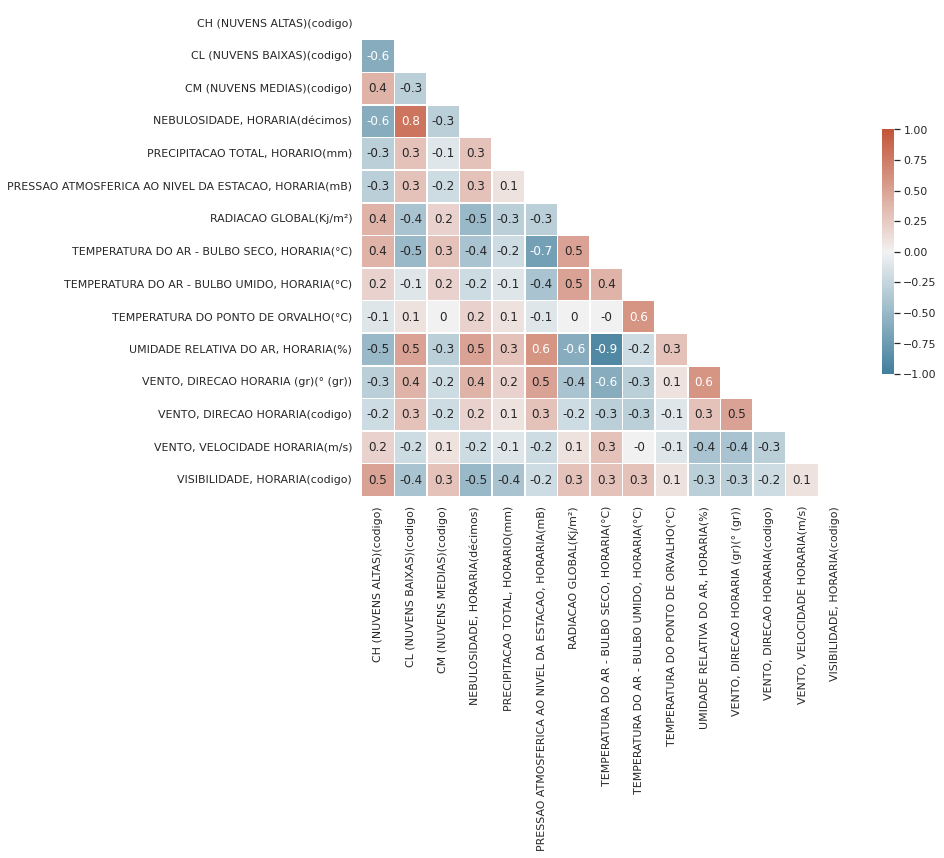

<Figure size 1440x1440 with 0 Axes>

In [ ]:
#Tema
sns.set_theme(style="white")

# Cálculo da Correlação
corr1 = dcorr1.corr().round(1)

# Mascára cobre metade do quadrado.
mask = np.triu(np.ones_like(corr1, dtype=bool))

# Tamanho do Mapa
f, ax = plt.subplots(figsize=(11, 9))

# Cor customizada do Mapa
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Desenhar o mapa
fig1 = sns.heatmap(corr1, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


plt.savefig('/content/drive/MyDrive/tcc/corr1.png', bbox_inches='tight')
plt.figure(figsize=(20,20))

### VALORES DE CORRELAÇÃO

In [ ]:
display(corr1)

,CH (NUVENS ALTAS)(codigo),CL (NUVENS BAIXAS)(codigo),CM (NUVENS MEDIAS)(codigo),"NEBULOSIDADE, HORARIA(décimos)","PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)",TEMPERATURA DO PONTO DE ORVALHO(°C),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))","VENTO, DIRECAO HORARIA(codigo)","VENTO, VELOCIDADE HORARIA(m/s)","VISIBILIDADE, HORARIA(codigo)"
CH (NUVENS ALTAS)(codigo),1.0,-0.6,0.4,-0.6,-0.3,-0.3,0.4,0.4,0.2,-0.1,-0.5,-0.3,-0.2,0.2,0.5
CL (NUVENS BAIXAS)(codigo),-0.6,1.0,-0.3,0.8,0.3,0.3,-0.4,-0.5,-0.1,0.1,0.5,0.4,0.3,-0.2,-0.4
CM (NUVENS MEDIAS)(codigo),0.4,-0.3,1.0,-0.3,-0.1,-0.2,0.2,0.3,0.2,0.0,-0.3,-0.2,-0.2,0.1,0.3
"NEBULOSIDADE, HORARIA(décimos)",-0.6,0.8,-0.3,1.0,0.3,0.3,-0.5,-0.4,-0.2,0.2,0.5,0.4,0.2,-0.2,-0.5
"PRECIPITACAO TOTAL, HORARIO(mm)",-0.3,0.3,-0.1,0.3,1.0,0.1,-0.3,-0.2,-0.1,0.1,0.3,0.2,0.1,-0.1,-0.4
"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)",-0.3,0.3,-0.2,0.3,0.1,1.0,-0.3,-0.7,-0.4,-0.1,0.6,0.5,0.3,-0.2,-0.2
RADIACAO GLOBAL(Kj/m²),0.4,-0.4,0.2,-0.5,-0.3,-0.3,1.0,0.5,0.5,0.0,-0.6,-0.4,-0.2,0.1,0.3
"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",0.4,-0.5,0.3,-0.4,-0.2,-0.7,0.5,1.0,0.4,-0.0,-0.9,-0.6,-0.3,0.3,0.3
"TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)",0.2,-0.1,0.2,-0.2,-0.1,-0.4,0.5,0.4,1.0,0.6,-0.2,-0.3,-0.3,-0.0,0.3
TEMPERATURA DO PONTO DE ORVALHO(°C),-0.1,0.1,0.0,0.2,0.1,-0.1,0.0,-0.0,0.6,1.0,0.3,0.1,-0.1,-0.1,0.1


In [ ]:
tab3 = corr1
tab3.to_excel(r'/content/drive/MyDrive/tcc/corr1.xlsx', freeze_panes=(1,0), index = True)

VARIÁVEIS RESTANTES

In [ ]:
dcorr1.columns

Index(['CH (NUVENS ALTAS)(codigo)', 'CL (NUVENS BAIXAS)(codigo)',
       'CM (NUVENS MEDIAS)(codigo)', 'NEBULOSIDADE, HORARIA(décimos)',
       'PRECIPITACAO TOTAL, HORARIO(mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)',
       'RADIACAO GLOBAL(Kj/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)',
       'TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)',
       'TEMPERATURA DO PONTO DE ORVALHO(°C)',
       'UMIDADE RELATIVA DO AR, HORARIA(%)',
       'VENTO, DIRECAO HORARIA (gr)(° (gr))', 'VENTO, DIRECAO HORARIA(codigo)',
       'VENTO, VELOCIDADE HORARIA(m/s)', 'VISIBILIDADE, HORARIA(codigo)'],
      dtype='object')

### VARIÁVEIS COM BAIXAS CORRELAÇÕES FORAM EXCLUÍDAS

In [ ]:
#Colunas com Baixas Correlações
dcorr2 = dcorr1.drop(['CH (NUVENS ALTAS)(codigo)',
                      'CM (NUVENS MEDIAS)(codigo)',
                      'NEBULOSIDADE, HORARIA(décimos)',
                      'PRECIPITACAO TOTAL, HORARIO(mm)',
                      'TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)',
                      'TEMPERATURA DO PONTO DE ORVALHO(°C)',
                      'VENTO, DIRECAO HORARIA(codigo)',
                      'VENTO, VELOCIDADE HORARIA(m/s)', 
                      'VISIBILIDADE, HORARIA(codigo)'], axis=1)
display(dcorr2)

,CL (NUVENS BAIXAS)(codigo),"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)",RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))"
Data Medicao,,,,,,
2007-07-09,3.333333,924.700000,373.863833,19.066667,96.000000,111.833333
2007-07-10,5.000000,923.966667,461.679208,19.400000,91.666667,114.250000
2007-07-11,3.000000,924.400000,834.335458,20.266667,81.000000,115.375000
2007-07-12,3.333333,924.833333,553.414042,19.333333,85.666667,128.791667
2007-07-13,5.000000,926.100000,508.040625,19.666667,92.666667,143.083333
...,...,...,...,...,...,...
2020-12-27,2.000000,921.833333,686.362583,20.804167,84.000000,86.541667
2020-12-28,2.000000,922.295833,876.021167,21.383333,79.291667,124.166667
2020-12-29,2.000000,920.925000,1020.476500,21.591667,75.000000,129.166667


CORRELAÇÃO DAS VARIÁVEIS RESTANTES

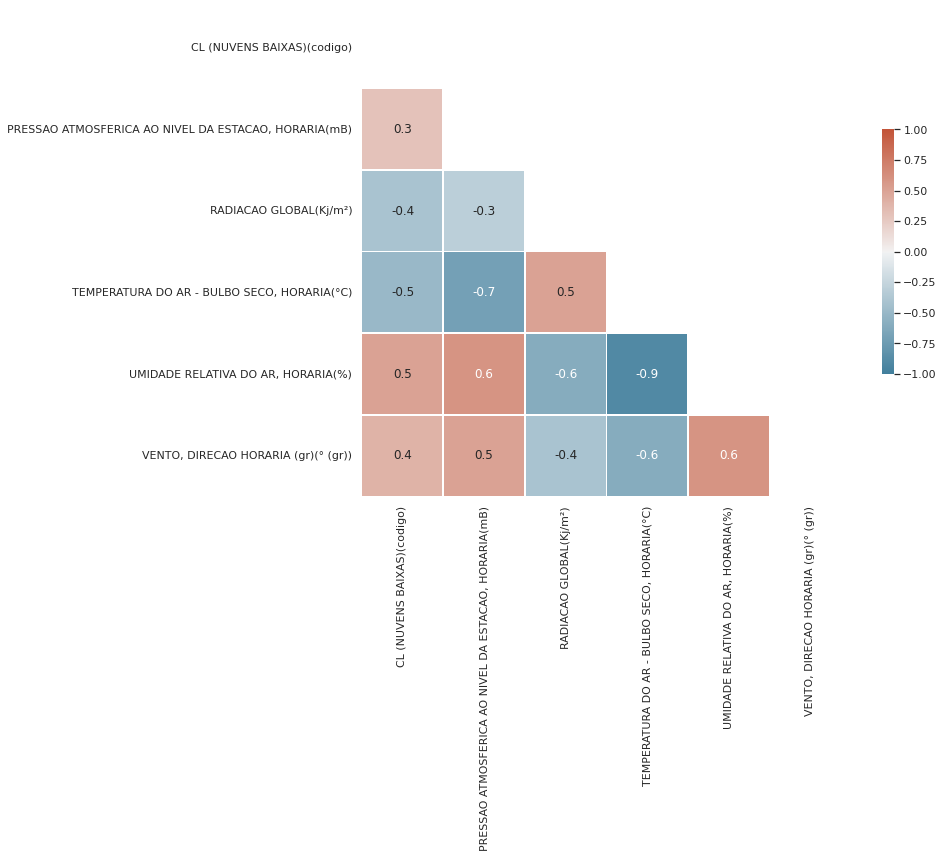

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = dcorr2.corr().round(1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:
dcorr2.columns

Index(['CL (NUVENS BAIXAS)(codigo)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)',
       'RADIACAO GLOBAL(Kj/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)',
       'UMIDADE RELATIVA DO AR, HORARIA(%)',
       'VENTO, DIRECAO HORARIA (gr)(° (gr))'],
      dtype='object')

# TABELA FINAL

In [ ]:
result = dcorr2.rename(columns={'CL (NUVENS BAIXAS)(codigo)':'CL(cod)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)':'Patm(mB)',
       'RADIACAO GLOBAL(Kj/m²)':'RG(Kj/m²)', 
       'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)': 'Tar(°C)',
       'UMIDADE RELATIVA DO AR, HORARIA(%)':'UR(%)',
       'VENTO, DIRECAO HORARIA (gr)(° (gr))': 'V(°)'})
result.index.rename('Data', inplace=True)
display(result)

,CL(cod),Patm(mB),RG(Kj/m²),Tar(°C),UR(%),V(°)
Data,,,,,,
2007-07-09,3.333333,924.700000,373.863833,19.066667,96.000000,111.833333
2007-07-10,5.000000,923.966667,461.679208,19.400000,91.666667,114.250000
2007-07-11,3.000000,924.400000,834.335458,20.266667,81.000000,115.375000
2007-07-12,3.333333,924.833333,553.414042,19.333333,85.666667,128.791667
2007-07-13,5.000000,926.100000,508.040625,19.666667,92.666667,143.083333
...,...,...,...,...,...,...
2020-12-27,2.000000,921.833333,686.362583,20.804167,84.000000,86.541667
2020-12-28,2.000000,922.295833,876.021167,21.383333,79.291667,124.166667
2020-12-29,2.000000,920.925000,1020.476500,21.591667,75.000000,129.166667


In [ ]:
with open('/content/drive/MyDrive/tcc/resultf.csv', 'w') as f:
  result.to_csv(f)

### EXPLORAÇÃO DA SÉRIE TEMPORAL

In [ ]:
dados = result.round(2)
display(dados)

,CL(cod),Patm(mB),RG(Kj/m²),Tar(°C),UR(%),V(°)
Data,,,,,,
2007-07-09,3.33,924.70,373.86,19.07,96.00,111.83
2007-07-10,5.00,923.97,461.68,19.40,91.67,114.25
2007-07-11,3.00,924.40,834.34,20.27,81.00,115.38
2007-07-12,3.33,924.83,553.41,19.33,85.67,128.79
2007-07-13,5.00,926.10,508.04,19.67,92.67,143.08
...,...,...,...,...,...,...
2020-12-27,2.00,921.83,686.36,20.80,84.00,86.54
2020-12-28,2.00,922.30,876.02,21.38,79.29,124.17
2020-12-29,2.00,920.92,1020.48,21.59,75.00,129.17


In [ ]:
resulttab = dados
resulttab.to_excel(r'/content/drive/MyDrive/tcc/result.xlsx', freeze_panes=(1,0), index = True)

### ANÁLISE ESTATÍSTICA DOS DADOS

In [ ]:
dadosd=dados.describe().transpose().round(1)
dadosd.to_excel(r'/content/drive/MyDrive/tcc/dadosd.xlsx', freeze_panes=(1,0), index = True)
display(dadosd)

,count,mean,std,min,25%,50%,75%,max
CL(cod),4925.0,3.5,1.3,0.0,2.0,3.5,5.0,8.5
Patm(mB),4925.0,922.8,1.9,916.3,921.4,922.7,924.2,928.8
RG(Kj/m²),4925.0,819.6,333.0,-3.5,634.3,814.0,965.2,3578.0
Tar(°C),4925.0,23.1,2.5,17.2,21.1,23.1,25.1,30.6
UR(%),4925.0,76.4,12.4,34.0,67.0,76.3,86.0,100.0
V(°),4925.0,109.3,27.0,13.2,90.1,110.3,127.2,255.3


### MÁXIMOS E MÍNIMOS DAS VARIÁVEIS

In [ ]:
MaxMins = pd.DataFrame({'Data Máximo' : dados.idxmax(), 'Máximo':dados.max(), 
                     'Data Mínimo':dados.idxmin(), 'Mínimo':dados.min()})
MaxMins.index.name = 'Variáveis'
MaxMins.to_excel(r'/content/drive/MyDrive/tcc/maxmins.xlsx', freeze_panes=(1,0), index = True)
display(MaxMins)

,Data Máximo,Máximo,Data Mínimo,Mínimo
Variáveis,,,,
CL(cod),2018-01-27,8.50,2010-10-09,0.00
Patm(mB),2019-08-06,928.85,2010-12-13,916.30
RG(Kj/m²),2017-12-27,3577.98,2013-12-04,-3.54
Tar(°C),2020-12-04,30.60,2017-07-31,17.20
UR(%),2009-05-25,100.00,2018-01-04,34.00
V(°),2008-02-27,255.33,2017-12-09,13.25


In [ ]:
#Criando Tabela para Gráficos
grf = dados.reset_index()
display(grf)

Variáveis,Data,CL(cod),Patm(mB),RG(Kj/m²),Tar(°C),UR(%),V(°)
0,2007-07-09,3.33,924.70,373.86,19.07,96.00,111.83
1,2007-07-10,5.00,923.97,461.68,19.40,91.67,114.25
2,2007-07-11,3.00,924.40,834.34,20.27,81.00,115.38
3,2007-07-12,3.33,924.83,553.41,19.33,85.67,128.79
4,2007-07-13,5.00,926.10,508.04,19.67,92.67,143.08
...,...,...,...,...,...,...,...
4920,2020-12-27,2.00,921.83,686.36,20.80,84.00,86.54
4921,2020-12-28,2.00,922.30,876.02,21.38,79.29,124.17
4922,2020-12-29,2.00,920.92,1020.48,21.59,75.00,129.17
4923,2020-12-30,2.00,920.78,909.04,22.09,76.58,114.75


### DISTRIBUIÇÃO DAS VARIÁVEIS

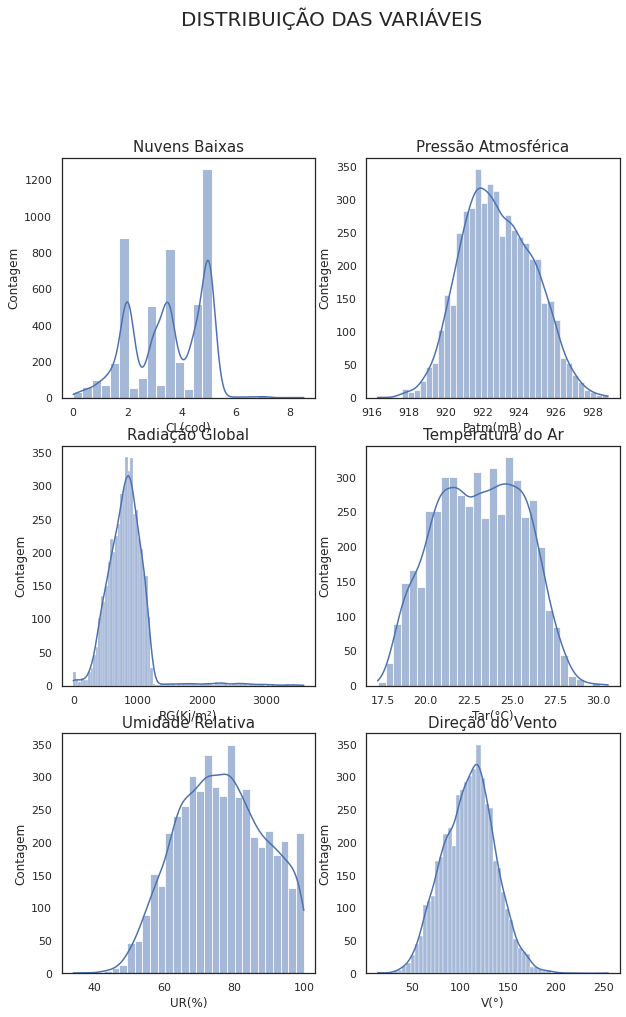

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,15))#, sharex=True)
fig.suptitle('DISTRIBUIÇÃO DAS VARIÁVEIS', y=1.02, fontsize=20)
ax[0][0].set_ylabel('Contagem')
ax[0][1].set_ylabel('Contagem')
ax[1][0].set_ylabel('Contagem')
ax[1][1].set_ylabel('Contagem')
ax[2][0].set_ylabel('Contagem')
ax[2][1].set_ylabel('Contagem')

#Nuvens Baixas
sns.histplot(dados['CL(cod)'], ax=ax[0][0], kde=True).set_title('Nuvens Baixas', fontsize=15)
sns.histplot(dados['Patm(mB)'], ax=ax[0][1], kde=True).set_title('Pressão Atmosférica', fontsize=15)
sns.histplot(dados['RG(Kj/m²)'], ax=ax[1][0], kde=True).set_title('Radiação Global', fontsize=15)
sns.histplot(dados['Tar(°C)'], ax=ax[1][1], kde=True).set_title('Temperatura do Ar', fontsize=15)
sns.histplot(dados['UR(%)'], ax=ax[2][0], kde=True).set_title('Umidade Relativa', fontsize=15)
sns.histplot(dados['V(°)'], ax=ax[2][1], kde=True).set_title('Direção do Vento', fontsize=15)

plt.savefig('/content/drive/MyDrive/tcc/dist.png', bbox_inches='tight')

In [ ]:
y4=dados.transform(lambda x: savgol_filter(x, 53,4, mode='nearest'))

### DADOS DAS VARIÁVEIS EM RELAÇÃO AO TEMPO

In [ ]:

fig = make_subplots(
    rows=6, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]],
    subplot_titles=("Nuvens Baixas", "Pressão Atmosférica", "Radiação Global", 
                    "Temperatura", "Umidade Relativa", "Direção do Vento")
)


fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['V(°)'],
        mode="lines",
        name="Direção do Vento"
    ),
    row=6, col=1
)

fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['UR(%)'],
        mode="lines",
        name="Umidade Relativa"
    ),
    row=5, col=1
)

fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['Tar(°C)'],
        mode="lines",
        name="Temperatura"
    ),
    row=4, col=1
)

fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['RG(Kj/m²)'],
        mode="lines",
        name="Radiação Global"
    ),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['Patm(mB)'],
        mode="lines",
        name="Pressão Atmosférica"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['CL(cod)'],
        mode="lines",
        name="Nuvens Baixas"
    ),
    row=1, col=1
)


fig.update_layout(
    height=800,
    showlegend=False,
    #title_text="DADOS DAS SÉRIES HISTÓRICA DAS VARIÁVEIS",
    title_x=0.5
)

fig.show()

### DADOS DAS VARIÁVEIS NO PERIODO ESPECÍFICO DOS OUTLIERS

In [ ]:



fig = make_subplots(
    rows=6, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]],
    subplot_titles=("Nuvens Baixas", "Pressão Atmosférica", "Radiação Global", 
                    "Temperatura", "Umidade Relativa", "Direção do Vento")
)


fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['V(°)'],
        mode="lines",
        name="Direção do Vento"
    ),
    row=6, col=1
)

fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['UR(%)'],
        mode="lines",
        name="Umidade Relativa"
    ),
    row=5, col=1
)

fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['Tar(°C)'],
        mode="lines",
        name="Temperatura"
    ),
    row=4, col=1
)

fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['RG(Kj/m²)'],
        mode="lines",
        name="Radiação Global"
    ),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['Patm(mB)'],
        mode="lines",
        name="Pressão Atmosférica"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=grf["Data"],
        y=y4['CL(cod)'],
         mode="lines",
        name="Nuvens Baixas"
    ),
    row=1, col=1
)


fig.update_layout(
    height=800,
    showlegend=False,
    #title_text="DADOS DAS SÉRIES HISTÓRICA DAS VARIÁVEIS (2017-2018)",
    title_x=0.5
)

fig.update_xaxes(range=['2017-06-01', '2018-06-30'])

fig.show()